<a href="https://colab.research.google.com/github/Tiagoeem/intro_ciencia_de_dados_2020/blob/master/Exploracao_Olist_emSala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [71]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

# Carregar os CSVs

In [72]:
import pandas as pd

In [73]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/e-commerce/dificil/OLIST/olist_sellers_dataset.csv')

# Exploração dataset Clientes

In [74]:
# Conhecendo o dataset
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [75]:
# Quais cidades tem no meu dataset
df_clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [76]:
# Quantas cidades diferentes temos no dataset?
len(df_clientes.customer_city.unique())

4119

In [77]:
# Total de clientes
print( 'O Número total de clientes é:', len(df_clientes.customer_unique_id.unique()))

O Número total de clientes é: 96096


In [78]:
df_temp = df_clientes.groupby(by= 'customer_city' ).count()
df_temp.sort_values( by= 'customer_id', ascending = False )

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
...,...,...,...,...
ibiara,1,1,1,1
rio espera,1,1,1,1
rio dos indios,1,1,1,1


In [79]:
df_clientes.groupby(by= 'customer_city' ).count().sort_values( by='customer_id', ascending=False ).head(7)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
campinas,1444,1444,1444,1444
porto alegre,1379,1379,1379,1379


In [80]:
df_clientes.customer_city.value_counts().head(7)

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
campinas           1444
porto alegre       1379
Name: customer_city, dtype: int64

In [81]:
df_clientes.customer_city.value_counts().head(7).reset_index()

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


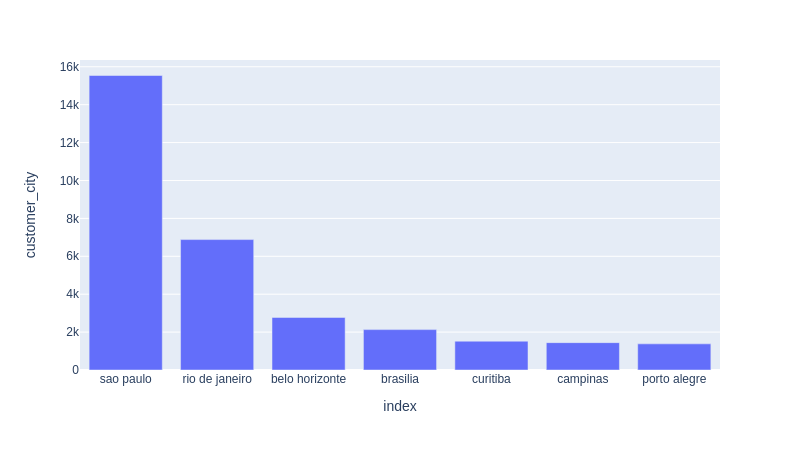

In [82]:
import plotly.express as px

data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )

In [83]:
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 4) ]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
083ca1aa470c280236380973a48f77c6,4,4,4,4
08e5b38d7948d37fbb2a59fc5e175ab1,4,4,4,4
12d8b5ed661190a3a08183644dfc504d,4,4,4,4
12f5d6e1cbf93dafd9dcc19095df0b3d,6,6,6,6
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
25a560b9a6006157838aab1bdbd68624,4,4,4,4
2ddc001b620bd90d0f4378cfde1db887,4,4,4,4
35ecdf6858edc6427223b64804cf028e,5,5,5,5
394ac4de8f3acb14253c177f0e15bc58,5,5,5,5


In [84]:
df_clientes.groupby( by = 'customer_unique_id' ).count()['customer_id'] > 2

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    False
0000b849f77a49e4a4ce2b2a4ca5be3f    False
0000f46a3911fa3c0805444483337064    False
0000f6ccb0745a6a4b88665a16c9f078    False
0004aac84e0df4da2b147fca70cf8255    False
                                    ...  
fffcf5a5ff07b0908bd4e2dbc735a684    False
fffea47cd6d3cc0a88bd621562a9d061    False
ffff371b4d645b6ecea244b27531430a    False
ffff5962728ec6157033ef9805bacc48    False
ffffd2657e2aad2907e67c3e9daecbeb    False
Name: customer_id, Length: 96096, dtype: bool

In [85]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [86]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
